# Data Pre-Processsing and Analysis using Python

### Background:

You have been given a collection of data from a company wishing to process its customer records for business purposes (acw_user_data.csv). The existing systems in-place at the company only export to a CSV file, and this is not in an appropriate format for analysis. You have been given the task of preparing this data for further analyses by your colleagues within the company, including representation changes, filtering, and deriving some new attributes / metrics for them.

These data include attributes such as first name, second name, credit card number, marital status, and even contains data on the customer’s car.

The number of records provided is significant, and therefore it is expected that solutions are robust to varying types of data, and varying values, offering a programmatic solution.

### Data Processing (70%) - Part 1


##### Question 1 - 3

1. Read in the provided ACW Data using the CSV library.


2. As a CSV file is an entirely flat file structure, we need to convert our data back into its
rich structure. Convert all flat structures into nested structures. These are notably:
a. Vehicle - consists of make, model, year, and type
b. Credit Card - consists of start date, end date, number, security code, and
IBAN.
c. Address - consists of the main address, city, and postcode.
For this task, it may be worthwhile inspecting the CSV headers to see which data
columns may correspond to these above.
Note: Ensure that the values read in are appropriately cast to their respective types.


3. The client informs you that they have had difficulty with errors in the dependants
column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion
from Task 2. These should be changed into something meaningful when
encountered.
Print a list where all such error corrections take place.
E.g. Problematic rows for dependants: [16, 58, 80, 98]

##### Explanation

_The set of codes below attempts to answer Questions 1 to 3:_

1. _I performed the reading of the file using the default libraries as adviced._
2. _I read in the contents of the file into a list which i did all manipulations on._
3. _I inspected the contents of file, focusing on the headers to compose the nested structures. I used a for loop for this purpose._
4. _While the conversion was ongoing, i took note of problemtic cells (the dependant column) and replaced null cells with 0._
5. _I also ensured the appropriate values were cast according to the advised data type for the new nested structure._
6. _I saved all problematic cells in a list during the conversion into the nested structure in an attempt to answer question 3_


_Find Codes below:_

In [1]:
# Importing Standard libraries

import csv
import json

In [2]:
# Reading the contents of the acw_user_data and storing in a list for manipluation

acw_data = []

try:
    with open('acw_user_data.csv', mode = 'r') as csv_file:
        user_data = csv.reader( csv_file, delimiter=',' )
    
        # saving the contents of the file into a list
        for line in user_data:
            acw_data.append(line)

except FileNotFoundError as err_:
    print("Wrong file or file path, please use the right file")
    
except Exception as err_:
    print("This error occured: ", err_)



In [3]:
# Converting the data into a nested structure using a for loop.
# Taking note of problematic cells in a list with a try and catch.
# Conversion of necessary values to appropriate types: Bool, Int and FLoat

# list variable declarations necessary for the loop logic:

customer_data= []
problematic_data = [] 

# Loop for nested structure conversion:

for index,line in enumerate(acw_data):
        
        # This will skip the first row since it contains only header information
        if index == 0:
            continue
        
        # Creating the Vehicle nested structure
        vehicle = {}
        vehicle["make"] = str(line[19])
        vehicle["model"] = str(line[20])
        vehicle["year"] = str(line[21])
        vehicle["category"] = str(line[22])
        
        # Creating the Credit Card nested structure
        credit_card = {}
        credit_card["start_date"] = str(line[6])
        credit_card["end_date"] = str(line[7])
        credit_card["number"] = int(line[8])
        credit_card["cvv"] = int(line[9])
        credit_card["iban"] = str(line[12])
        
        # Creating the Address nested structure
        address = {}
        address["street"] = str(line[0])
        address["city"] = str(line[1])
        address["postcode"] = str(line[2])
        
        # Creating the entire nested structure for the data set
        customer = {}
        customer["first_name"] = str(line[11])
        customer["second_name"] = str(line[13])
        customer["age"] = int(line[3])
        customer["sex"] = str(line[18])
        
        # Conversion of the retired column to boolean
        if (line[16]) == "True":
            customer["retired"] = True
        else:
            customer["retired"] = False
         
        # Catching problematic dependant values and replacing them with 0
        try:
            customer["dependants"] = int(line[10])
        except:
            problematic_data.append(index)
            customer["dependants"] = int(0)
             
        customer["salary"] = int(line[17])
        customer["pension"] = int(line[15])
        customer["company"] = str(line[5])
        customer["commute_distance"] = float(line[4])
        customer["Vehicle"] = (vehicle)
        customer["Credit Card"] = (credit_card)
        customer["Address"] = (address)
        customer_data.append(customer)
        

In [5]:
# Inspect new nested structure. Looks Good!
# Question 1 and 2 answered.

customer_data[0]

{'first_name': 'Kieran',
 'second_name': 'Wilson',
 'age': 89,
 'sex': 'Male',
 'retired': True,
 'dependants': 3,
 'salary': 72838,
 'pension': 7257,
 'company': 'N/A',
 'commute_distance': 0.0,
 'Vehicle': {'make': 'Hyundai',
  'model': 'Bonneville',
  'year': '2009',
  'category': 'Pickup'},
 'Credit Card': {'start_date': '08/18',
  'end_date': '11/27',
  'number': 676373692463,
  'cvv': 875,
  'iban': 'GB62PQKB71416034141571'},
 'Address': {'street': '70 Lydia isle',
  'city': 'Lake Conor',
  'postcode': 'S71 7XZ'}}

In [6]:
# For question 3, print the contents of the problematic_data list

print("Find list of indexes of problematic data cells")

print(problematic_data)

Find list of indexes of problematic data cells
[22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


##### Question 4

4. Write all records to a processed.json file in the JSON data format. This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person.

##### Explanation

_1. I created a function to create a json files since there are other scenerios for other questions where i will have to perform the same operation._

_2. I used this function to create my processed.json file_

In [7]:
#function(writetojson) to create json file 

def writetojson(filename, data):
    with open( filename +'.json', mode='w') as data_json:
        json.dump( data, data_json ) 


In [8]:
# file name = processed
# data is = customer_data(the processed and converted data structure)

try:
    # create processed jsonfile
    writetojson('processed', customer_data)
    print("processed.json file has been created successfully")
    
except Exception as err_:
    print(err)

processed.json file has been created successfully


##### Question 5

5. You should create two additional file outputs, retired.json and employed.json, these should contain all retired customers (as indicated by the retired field in the CSV), and all employed customers respectively (as indicated by the employer field in the CSV) and be in the JSON data format.

##### Explanation

_1. I will utilise the function i created earlier to create both json files._

_2. If a user is marked as TRUE for the retired column, he will be in the retired.json, else he will be in the employed.json._

_NOTE: If you are not marked as true on the retired column, you are employed. This way the employed field may not be checked._

In [9]:
# declare variables to hold both retired and employed data

retired_data = []
employed_data = []

# perfrom check based on the retired column criteria:
for data_ in customer_data:
    
    if data_["retired"] == True:
        retired_data.append(data_)
    else:
        employed_data.append(data_)

In [10]:
#create the files as directed using custom function

try:
    writetojson('retired', retired_data)
    writetojson('employed', employed_data)
    print("The retired.json and employed.json files have been created successfully")
    
except Exception as err_:
    print(err)


The retired.json and employed.json files have been created successfully


##### Question 6

6. The client states that there may be some issues with credit card entries. Any
customers that have more than 10 years between their start and end date need
writing to a separate file, called remove_ccard.json, in the JSON data format. The
client will manually deal with these later based on your output. They request that you
write a function to help perform this, which accepts a single row from the CSV data,
3
and outputs whether the row should be flagged. This can then be used when determining whether to write the current person to the remove_ccard file.

##### Explanation

_1. I created a function to help with splitting and extracting the year o the card of a user: card_date_split_

_2. I created a function which accepts accepts a single row from the CSV and outputs whether the row should be flagged: remove_card_decision._

_This function also checks the month if the year is difference between the date is 10. This will allow us to be more accurate with determining records to be flagged_

_3. All flagged users are written to remove_ccard.json using the custom write to json function created earlier._


In [11]:
# the card_date_split function to help with the year extraction from a date

def date_split(date):
    return date.split('/')


In [12]:
# the function which accepts a data row and determines if flag is necessary

def remove_card_decision(datarow_):

    start_date = date_split(datarow_["Credit Card"]['start_date'])
    end_date = date_split(datarow_["Credit Card"]['end_date'])
    
    # this condition performs the 10 year validation criteria on the card
    if (int(end_date[1]) - int(start_date[1])) > 10:    
        return True
    
    # this checks the month to investigate if the difference is 10
    elif (int(end_date[1]) - int(start_date[1])) == 10:
        if int(end_date[0]) > int(start_date[0]):
            return True
        else:
            return False  
    
    else:
        return False


In [13]:
remove_ccard_data = []

# loop which checks each row of our csv and determines if it should be flagged or not
for data_ in customer_data:
    if remove_card_decision(data_) == True:
        remove_ccard_data.append(data_)

# creating remove_ccard.json file 
try:
    writetojson("remove_ccard", remove_ccard_data)
    print("The remove_ccard.json has been created successfully")
    
except Exception as err_:
    print(err)   


The remove_ccard.json has been created successfully


##### Question 7

7. You have been tasked with calculating some additional metrics which will be used for ranking customers. You should create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json:

a. Add, and calculate appropriately, this new attribute. It should represent the Salary that a customer earns, per mile of their commute.

i. Note: If a person travels 1 or fewer commute miles, then their salary-commute would be just their salary.

b. Sort these records by that new metric, in ascending order.

c. Store the output file out as a JSON format, for a commute.json file.

##### Explanation

_1. Opened the processed Json file using a contect manager._

_2. I looped through each row to perform the calculation as adviced._

_3. I ensured sorted the result in ascending order as adviced._

_4. I created a commute.json file to store the result._

In [14]:
# opened processed.json file while handing possible exceptions

try:
    with open('processed.json', mode='r') as json_data:
        processed_json = json.load(json_data)
        
    # looped through each row of the file to create new column and perform calculations
    for data in processed_json:

        if data["commute_distance"] <= 1:
            data["Salary-Commmute"] = data["salary"]
        else:
            data["Salary-Commmute"] = int(data["salary"]/data["commute_distance"])
    
    #sorting the processed records in ascendong order according to Salary-Commutee
    processed_json.sort(key=lambda x: x.get('Salary-Commmute'))
    
    #creating the commute json file
    try:
        writetojson('commute', processed_json)
        print("The commute.json has been created successfully")

    except Exception as err_:
        print(err)   
    
        
except FileNotFoundError as err_:
    print("Wrong file or file path, please use the right file")
    
except Exception as err_:
    print("This error occured: ", err_)


The commute.json has been created successfully


#### Data Visualization (20%) - Part 2

Your client wishes to understand the data they have on their customers a bit more by use of visualisations. With use of Pandas and Seaborn read in the original CSV file provided with the assignment.

In [15]:
#using pandas and seaborn

import pandas as pd
import seaborn as sns

In [16]:
#read in the original dataframe provided

customer_dataframe = pd.read_csv('acw_user_data.csv')

##### Question 1


Obtain the Data Series for Salary, and Age, and calculate the following:

a. Mean Salary

b. Median Age

In [17]:
# Creating age and salary data series 

salary_data = customer_dataframe["Yearly Salary (GBP)"]
age_data = customer_dataframe["Age (Years)"]


# Calculating the mean and salary
mean_salary = salary_data.mean()
median_age = age_data.median()


#print result
print(f"1a.   The Mean Salary is: {round(mean_salary,2)}")
print(f"1b.   The Median Age is: {median_age}")


1a.   The Mean Salary is: 57814.08
1b.   The Median Age is: 54.0


##### Question 2

Perform univariate plots of the following data attributes:

a. Age, calculating how many bins would be required for a bin_width of 5.

b. Dependents, fixing data errors with seaborn itself.

c. Age (of default bins), conditioned on Marital Status

_Answer for 2A:_

====
_bin_number = range of data / bin_width_

In [18]:
# caluclate bin number 
# use age_data series from question 1

bins = ( age_data.astype(int).max() - age_data.astype(int).min() ) / 5

print(f"The required bin number is: {round(bins)}")


The required bin number is: 15


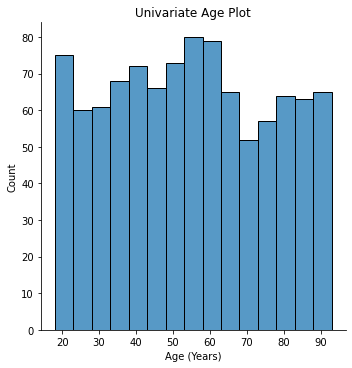

In [19]:
# univariate age plot:

plot_2a = sns.displot(age_data,binwidth=5).set(title='Univariate Age Plot')

_Answer for 2B:_

_I filled the null dependant values with the mode of the dependant data_

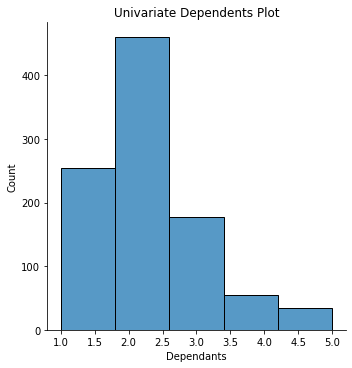

In [20]:
# univariate dependent plot:

plot_2b = sns.displot(customer_dataframe["Dependants"].fillna(customer_dataframe["Dependants"].mode()),bins = 5).set(title='Univariate Dependents Plot')

_Answer for 2C:_



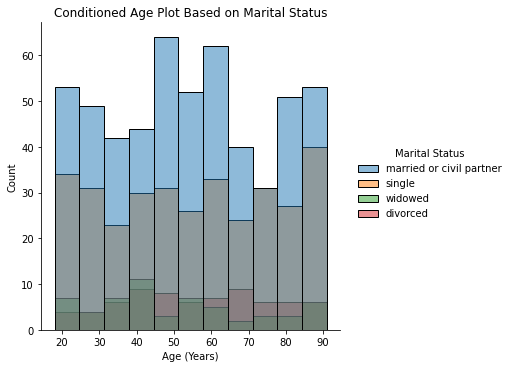

In [21]:
# univariate conditioned age plot:

plot_2c = sns.displot(data = customer_dataframe, x = "Age (Years)",  hue='Marital Status').set(title='Conditioned Age Plot Based on Marital Status')

##### Question 3

Perform multivariate plots with the following data attributes:

a. Commuted distance against salary.

b. Age against Salary

c. Age against Salary conditioned by Dependants

_Answer for 3A:_


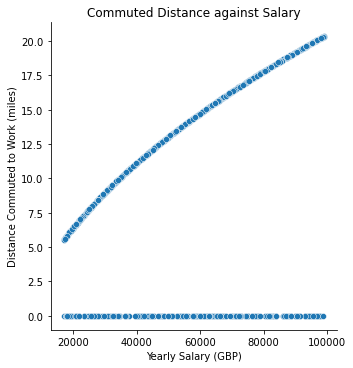

In [22]:
# commuted distance against salary plot:

plot_3a = sns.relplot(data = customer_dataframe, y='Distance Commuted to Work (miles)', x='Yearly Salary (GBP)').set(title='Commuted Distance against Salary')

_Answer for 3B:_


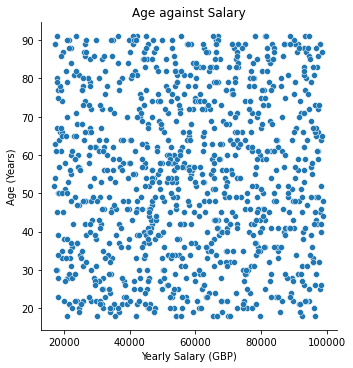

In [23]:
# Age against Salary:

plot_3b = sns.relplot(data = customer_dataframe, y='Age (Years)', x='Yearly Salary (GBP)').set(title='Commuted Distance against Salary').set(title='Age against Salary')

_Answer for 3C:_


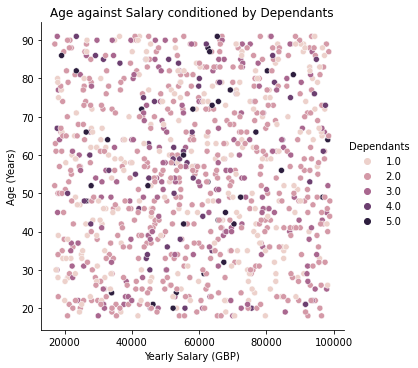

In [24]:
# Age against Salary conditioned by Dependants:

plot_3c = sns.relplot(data = customer_dataframe, y='Age (Years)', x='Yearly Salary (GBP)', hue = 'Dependants').set(title='Age against Salary conditioned by Dependants')

##### Question 4

Your client would like the ability to save the plots which you have produced. Provide a Notebook cell which can do this.

_Answer for 4:_

_I used the dictionary approach. The filepaths were the keys, while the figures were the values._

In [25]:
#creating dict to store key and value of the 6 figures
figures_to_save = {}
figures_to_save["./plot_2a.png"] = plot_2a
figures_to_save["./plot_2b.png"] = plot_2b
figures_to_save["./plot_2c.png"] = plot_2c
figures_to_save["./plot_3a.png"] = plot_3a
figures_to_save["./plot_3b.png"] = plot_3b
figures_to_save["./plot_3c.png"] = plot_3c


#using a for loop to save the plots

try:
    for file_, figure_ in figures_to_save.items():
        figure_.savefig(file_)
        
    print("The 6 figures have been saved successfully")

except Exception as err_:
        print(err)  


The 6 figures have been saved successfully
